# Find the Flag

In this project, we’ll use decision trees to try to predict the continent of flags based on several of these features.

We’ll explore which features are the best to use and the best way to create your decision tree.

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('flags.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        194 non-null    object
 1   Landmass    194 non-null    int64 
 2   Zone        194 non-null    int64 
 3   Area        194 non-null    int64 
 4   Population  194 non-null    int64 
 5   Language    194 non-null    int64 
 6   Religion    194 non-null    int64 
 7   Bars        194 non-null    int64 
 8   Stripes     194 non-null    int64 
 9   Colors      194 non-null    int64 
 10  Red         194 non-null    int64 
 11  Green       194 non-null    int64 
 12  Blue        194 non-null    int64 
 13  Gold        194 non-null    int64 
 14  White       194 non-null    int64 
 15  Black       194 non-null    int64 
 16  Orange      194 non-null    int64 
 17  Mainhue     194 non-null    object
 18  Circles     194 non-null    int64 
 19  Crosses     194 non-null    int64 
 20  Saltires  

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [23]:
print(df.columns)
print(df.Landmass.unique())

Index(['Name', 'Landmass', 'Zone', 'Area', 'Population', 'Language',
       'Religion', 'Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange', 'Mainhue', 'Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text', 'Topleft', 'Botright'],
      dtype='object')
[5 3 4 6 1 2]


In [9]:
# We’re eventually going to use create a decision tree to classify what Landmass a country is on.
labels = df['Landmass']
features = df[['Bars', 'Stripes', 'Colors', 'Red', 'Green', 'Blue', 'Gold',
       'White', 'Black', 'Orange','Circles', 'Crosses', 'Saltires',
       'Quarters', 'Sunstars', 'Crescent', 'Triangle', 'Icon', 'Animate',
       'Text']]
# Finally, let’s split these DataFrames into a training set and test set using the train_test_split() function.
train_x,test_x,train_y,test_y = train_test_split(features,labels,random_state=41)

# Make and Test the Model

In [26]:
#Making Our base model
model = DecisionTreeClassifier(random_state=2)
model.fit(train_x,train_y)
print(model.score(test_x,test_y))

0.3469387755102041


Since there are six possible landmasses, if we randomly guessed, we’d expect to be right about 16% of the time but our model is 36.73 % accurate which is even better.

# Tuning the Model

12
1 0.30612244897959184
2 0.4489795918367347
3 0.40816326530612246
4 0.4489795918367347
5 0.46938775510204084
6 0.4489795918367347
7 0.3877551020408163
8 0.3469387755102041
9 0.3469387755102041
10 0.3673469387755102
11 0.3673469387755102
12 0.3673469387755102


Text(0.5, 1.0, 'Finding Best Max Depth')

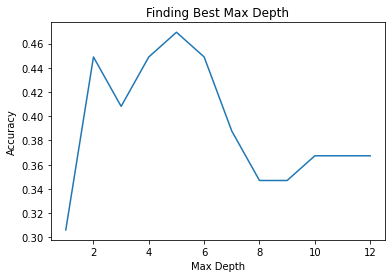

In [34]:
print(model.tree_.max_depth)
score = []
for i in range(1,13):
    model = DecisionTreeClassifier(random_state=2,max_depth=i)
    model.fit(train_x,train_y)
    score.append(model.score(test_x,test_y))
    print(i,model.score(test_x,test_y))
sns.lineplot(x=range(1,13),y=score)  
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Finding Best Max Depth')

As we can see that using max_depth 5 will result in score of 47% , we will use it in our final model. If the tree is too big, we’re getting too specific and relying too heavily on the training data.

# Final Model

In [35]:
model = DecisionTreeClassifier(random_state=2,max_depth=5)
model.fit(train_x,train_y)
print(model.score(test_x,test_y))

0.46938775510204084


Since there are six possible landmasses, if we randomly guessed, we’d expect to be right about 16% of the time but our model is 47% accurate which is way better.